# EDA and Cleaning of Lending Club Loan Data

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Making lite version for training

In [3]:
RAW_DATA_PATH = '../data/raw/lending-club-full.csv'
LITE_DATA_PATH = '../data/processed/lending-club-lite.csv'

In [3]:
# Cut the dataset to include essential columns only
cols_to_keep = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
    'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies'
]

df = pd.read_csv(RAW_DATA_PATH, usecols=cols_to_keep)

print(f'Raw dataset shape: {df.shape}')


Raw dataset shape: (2260668, 24)


In [6]:
print(f'Distribution of target variable (count) - {df["loan_status"].value_counts()}')

Distribution of target variable (count) - loan_status
Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: count, dtype: int64


In [7]:
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

fully_paid = df[df['loan_status'] == 'Fully Paid']
charged_off = df[df['loan_status'] == 'Charged Off']

df = pd.concat([
    fully_paid.sample(n=4000, random_state=42),
    charged_off.sample(n=1000, random_state=42)
]).sample(frac=1, random_state=42).reset_index(drop=True)

print(f'Dataset shape: {df.shape}')

Dataset shape: (5000, 24)


In [8]:
# Save the lite dataset
os.makedirs(os.path.dirname(LITE_DATA_PATH), exist_ok=True)
df.to_csv(LITE_DATA_PATH, index=False)
print(f"Lite dataset saved to {LITE_DATA_PATH}")

Lite dataset saved to ../data/processed/lending-club-lite.csv


## Checking the dataset

In [4]:
df = pd.read_csv(LITE_DATA_PATH)

In [10]:
print(f'Shape of the dataset: {df.shape}')

Shape of the dataset: (5000, 24)


In [11]:
print(f'Duplicates in the dataset: {df.duplicated().sum()}')

Duplicates in the dataset: 0


In [12]:
print(df.dtypes.sort_values())

loan_amnt                 int64
revol_bal                 int64
total_acc               float64
revol_util              float64
pub_rec                 float64
open_acc                float64
dti                     float64
mort_acc                float64
pub_rec_bankruptcies    float64
installment             float64
int_rate                float64
annual_inc              float64
verification_status      object
issue_d                  object
home_ownership           object
purpose                  object
emp_length               object
earliest_cr_line         object
sub_grade                object
grade                    object
term                     object
initial_list_status      object
application_type         object
loan_status              object
dtype: object


In [13]:
print("Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))

Missing values per column:
emp_length              286
mort_acc                194
revol_util                4
pub_rec_bankruptcies      2
installment               0
loan_amnt                 0
int_rate                  0
term                      0
home_ownership            0
sub_grade                 0
grade                     0
annual_inc                0
purpose                   0
verification_status       0
issue_d                   0
loan_status               0
open_acc                  0
earliest_cr_line          0
dti                       0
pub_rec                   0
total_acc                 0
revol_bal                 0
application_type          0
initial_list_status       0
dtype: int64


Columns with missing values

`emp_length`: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

`mort_acc`: Number of mortgage accounts.

`revol_util`: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

`pub_rec_bankruptcies`: Number of public record bankruptcies


<Axes: >

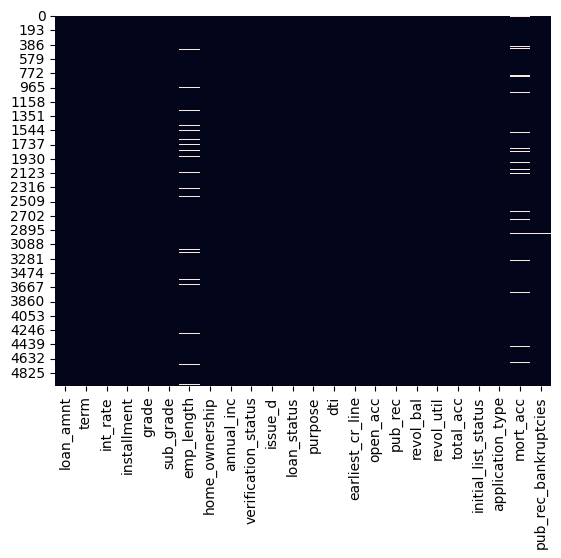

In [14]:
sns.heatmap(df.isnull(), cbar=False)

In [15]:
print(f'Distribution of target variable (count) - {df["loan_status"].value_counts()}')
print(f'\nDistribution of target variable (%) - {df["loan_status"].value_counts(normalize=True) * 100}')

Distribution of target variable (count) - loan_status
Fully Paid     4000
Charged Off    1000
Name: count, dtype: int64

Distribution of target variable (%) - loan_status
Fully Paid     80.0
Charged Off    20.0
Name: proportion, dtype: float64


Why 80-20? Just to challenge myself but not too extreme as before that has 99-1. This is a part of learning.

In [16]:
print(f'Negative numbers -> Income: {(df["annual_inc"] < 0).sum()} | Loan Amount: {(df["loan_amnt"] < 0).sum()} | DTI: {(df["dti"] < 0).sum()}')
print(f'Impossible values -> High DTI (>100): {(df["dti"] > 100).sum()}')

Negative numbers -> Income: 0 | Loan Amount: 0 | DTI: 0
Impossible values -> High DTI (>100): 0


In [17]:
obj_cols = df.select_dtypes(include='object').columns

print("Categories in column:\n")
for col in obj_cols:
    print(col)
    print(df[col].unique())
    print()

Categories in column:

term
[' 36 months' ' 60 months']

grade
['B' 'C' 'D' 'A' 'E' 'G' 'F']

sub_grade
['B5' 'C2' 'D3' 'A2' 'A4' 'B4' 'C3' 'C4' 'E1' 'B2' 'C5' 'D2' 'C1' 'E5'
 'B3' 'E2' 'B1' 'D4' 'E4' 'E3' 'A3' 'G5' 'D1' 'F2' 'A5' 'G2' 'A1' 'F5'
 'F1' 'F4' 'D5' 'F3' 'G1' 'G3' 'G4']

emp_length
[nan '10+ years' '2 years' '5 years' '< 1 year' '6 years' '8 years'
 '1 year' '4 years' '9 years' '7 years' '3 years']

home_ownership
['OWN' 'MORTGAGE' 'RENT' 'ANY']

verification_status
['Verified' 'Source Verified' 'Not Verified']

issue_d
['Jul-2015' 'Jul-2016' 'Jun-2013' 'Aug-2017' 'Jan-2011' 'Sep-2016'
 'Mar-2016' 'Jun-2014' 'Feb-2017' 'Feb-2013' 'Oct-2015' 'Oct-2017'
 'Mar-2015' 'Feb-2014' 'Jun-2015' 'Aug-2015' 'Sep-2017' 'Dec-2013'
 'Jan-2017' 'Sep-2012' 'Dec-2016' 'Mar-2014' 'Sep-2009' 'Nov-2015'
 'Aug-2013' 'Dec-2017' 'Nov-2013' 'Sep-2015' 'Jan-2015' 'Feb-2015'
 'Jan-2016' 'Oct-2018' 'Feb-2018' 'Dec-2014' 'Aug-2016' 'Mar-2012'
 'Feb-2016' 'Oct-2011' 'Dec-2015' 'Aug-2014' 'Jun-2017' 'Jul

In [18]:
df[obj_cols].nunique()

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           4
verification_status      3
issue_d                124
loan_status              2
purpose                 14
earliest_cr_line       490
initial_list_status      2
application_type         2
dtype: int64

## Visualization

What insights to extract:
- loan_status vs features
- outliers (boxplot for numeric) -> may get capped
- distributions (barchart for categorical) -> minor category may get groupped into 'others'

In [19]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if 'loan_status' in categorical_cols:
    categorical_cols.remove('loan_status')

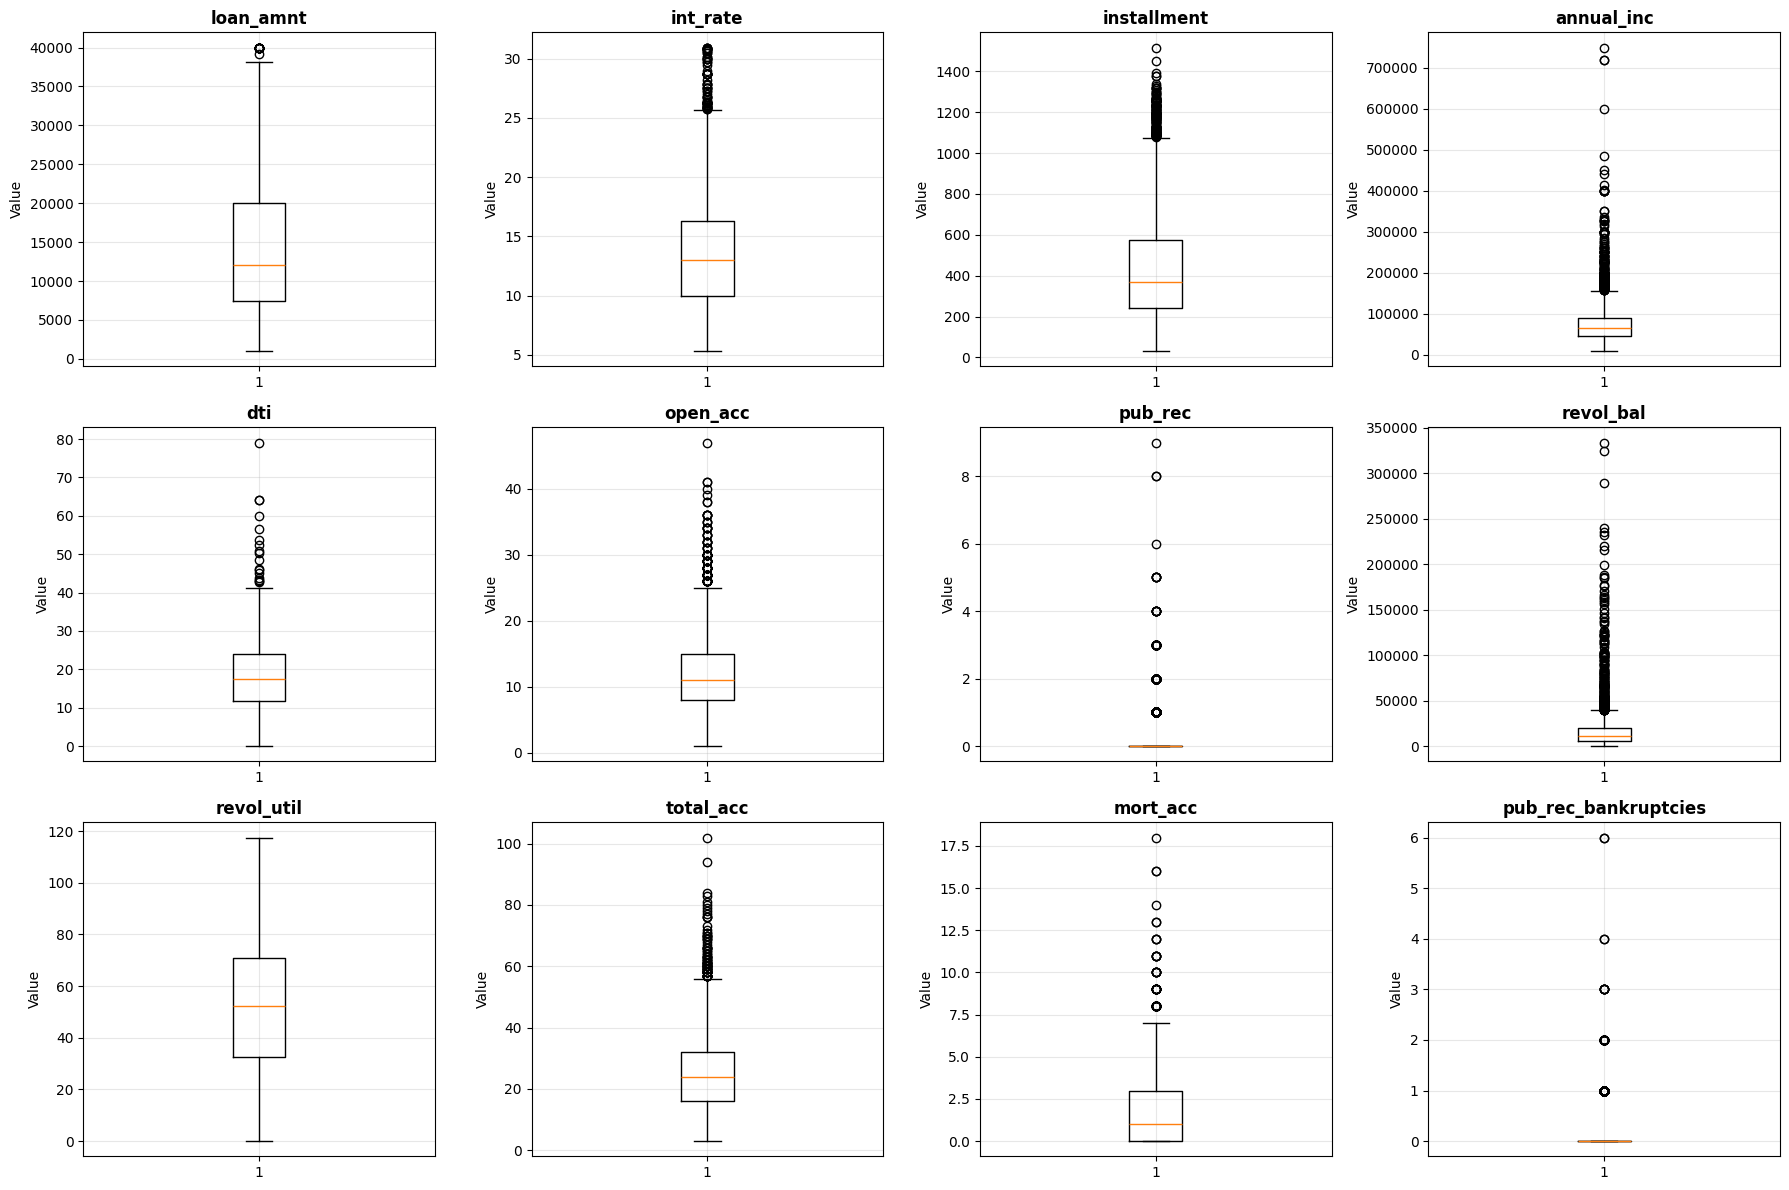

In [20]:
n_numeric = len(numeric_cols)
cols_per_row = 4

# ceiling division to ensure all columns fits
n_rows = (n_numeric + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

for idx in range(n_numeric, len(axes)):
    axes[idx].set_visible(False)
    
plt.tight_layout()
plt.show()

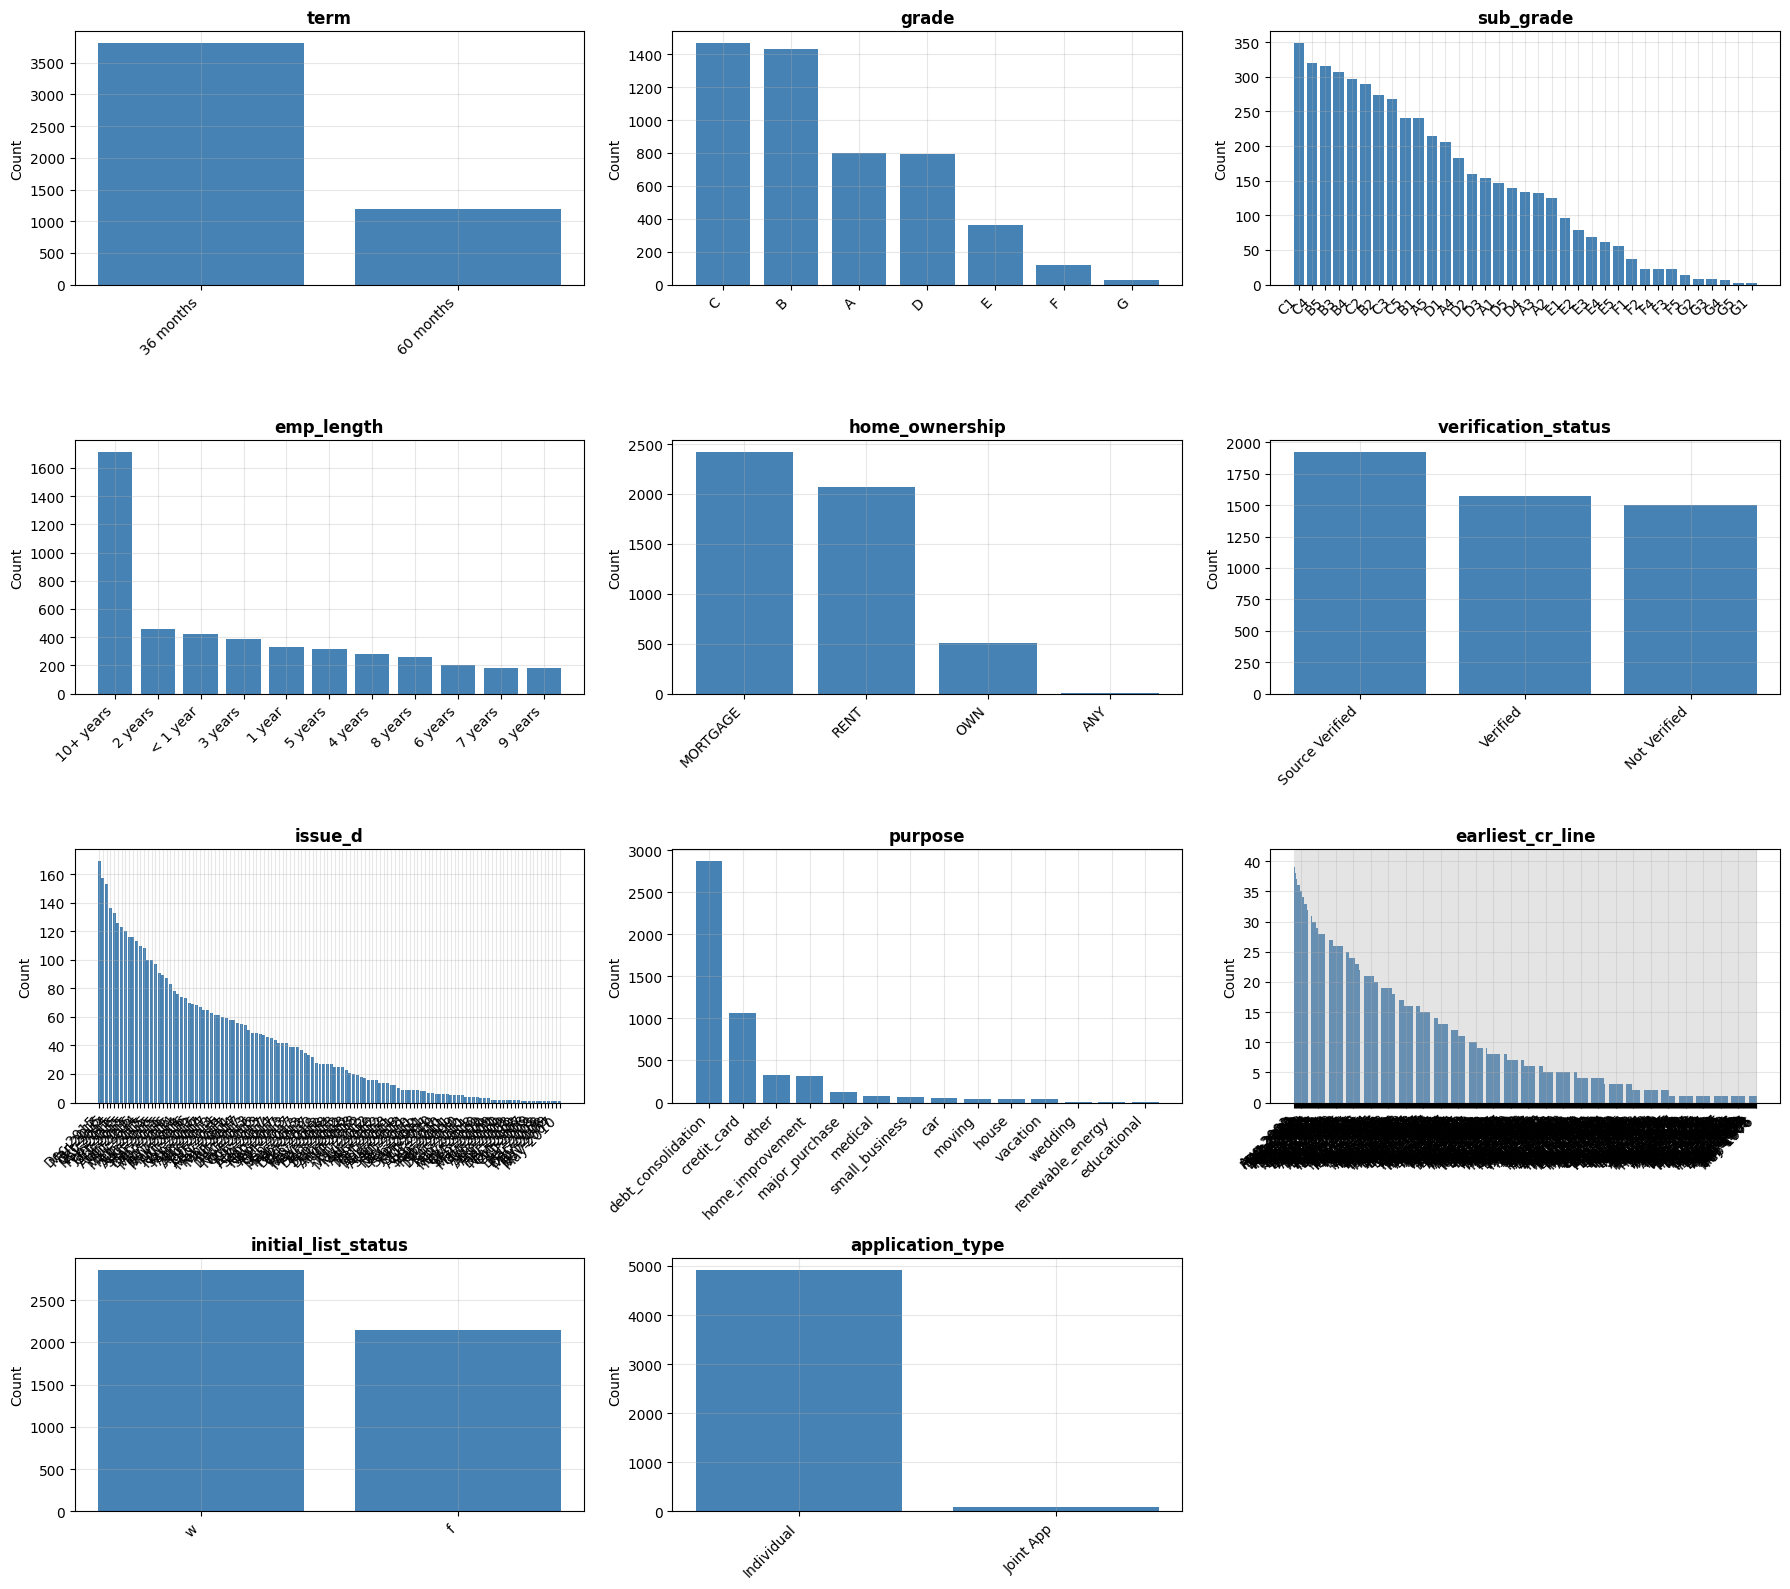

In [21]:
n_categorical = len(categorical_cols)
cols_per_row = 3

# another ceiling division
n_rows = (n_categorical + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, color='steelblue')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(True, alpha=0.3)

for idx in range(n_categorical, len(axes)):
    axes[idx].set_visible(False)
    
plt.tight_layout()
plt.show()

In [26]:
colors = {'Fully Paid': '#2ecc71', 'Charged Off': '#e74c3c'}
statuses = ['Fully Paid', 'Charged Off']

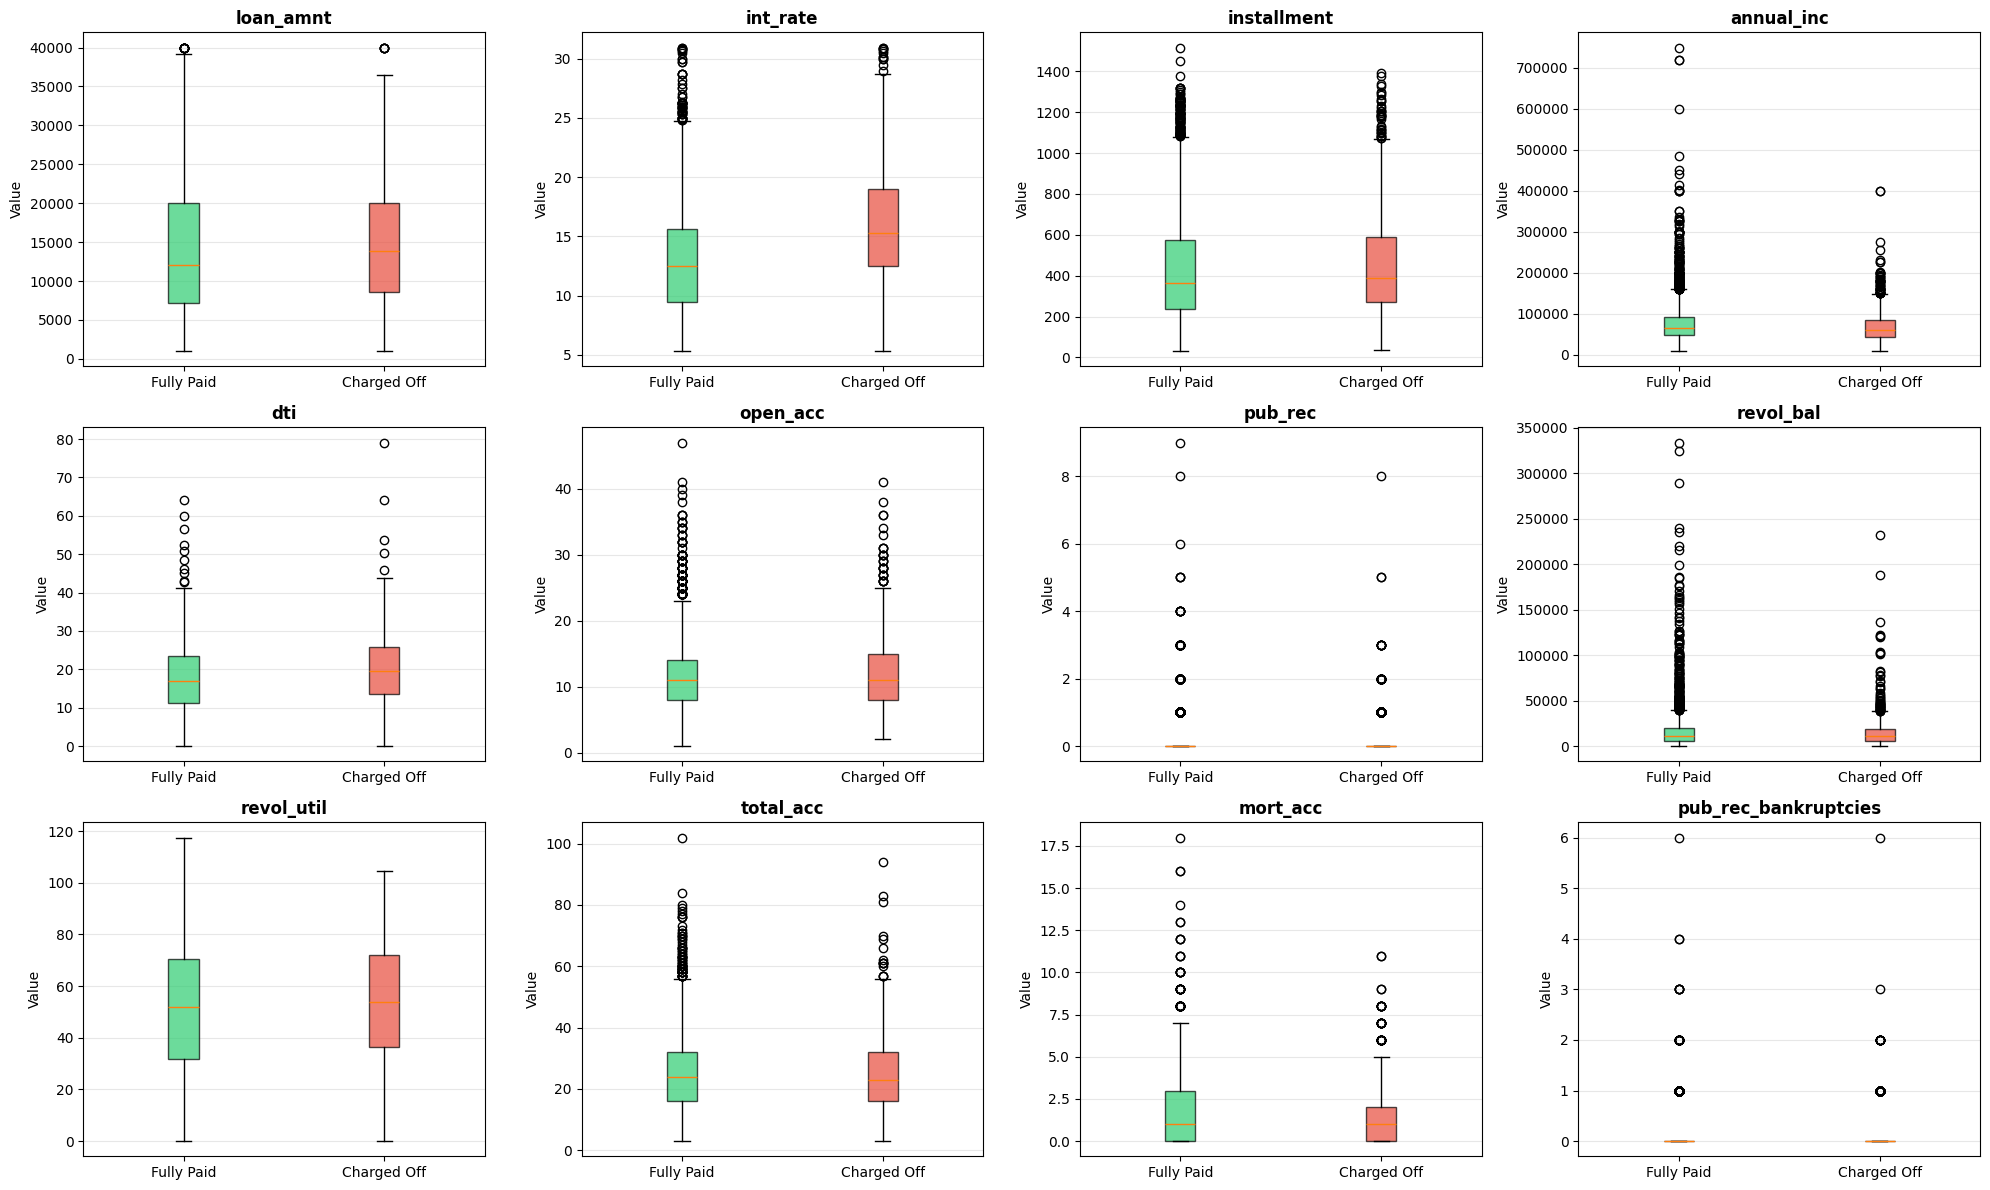

In [29]:
n_numeric = len(numeric_cols)
cols_per_row = 4

n_rows = (n_numeric + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    data_to_plot = [df[df['loan_status'] == status][col].dropna() for status in statuses]
    bp = axes[idx].boxplot(data_to_plot, tick_labels=statuses, patch_artist=True)
    
    for patch, status in zip(bp['boxes'], statuses):
        patch.set_facecolor(colors[status])
        patch.set_alpha(0.7)
        
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3, axis='y')

for idx in range(n_numeric, len(axes)):
    axes[idx].set_visible(False)
    
plt.tight_layout()
plt.show()

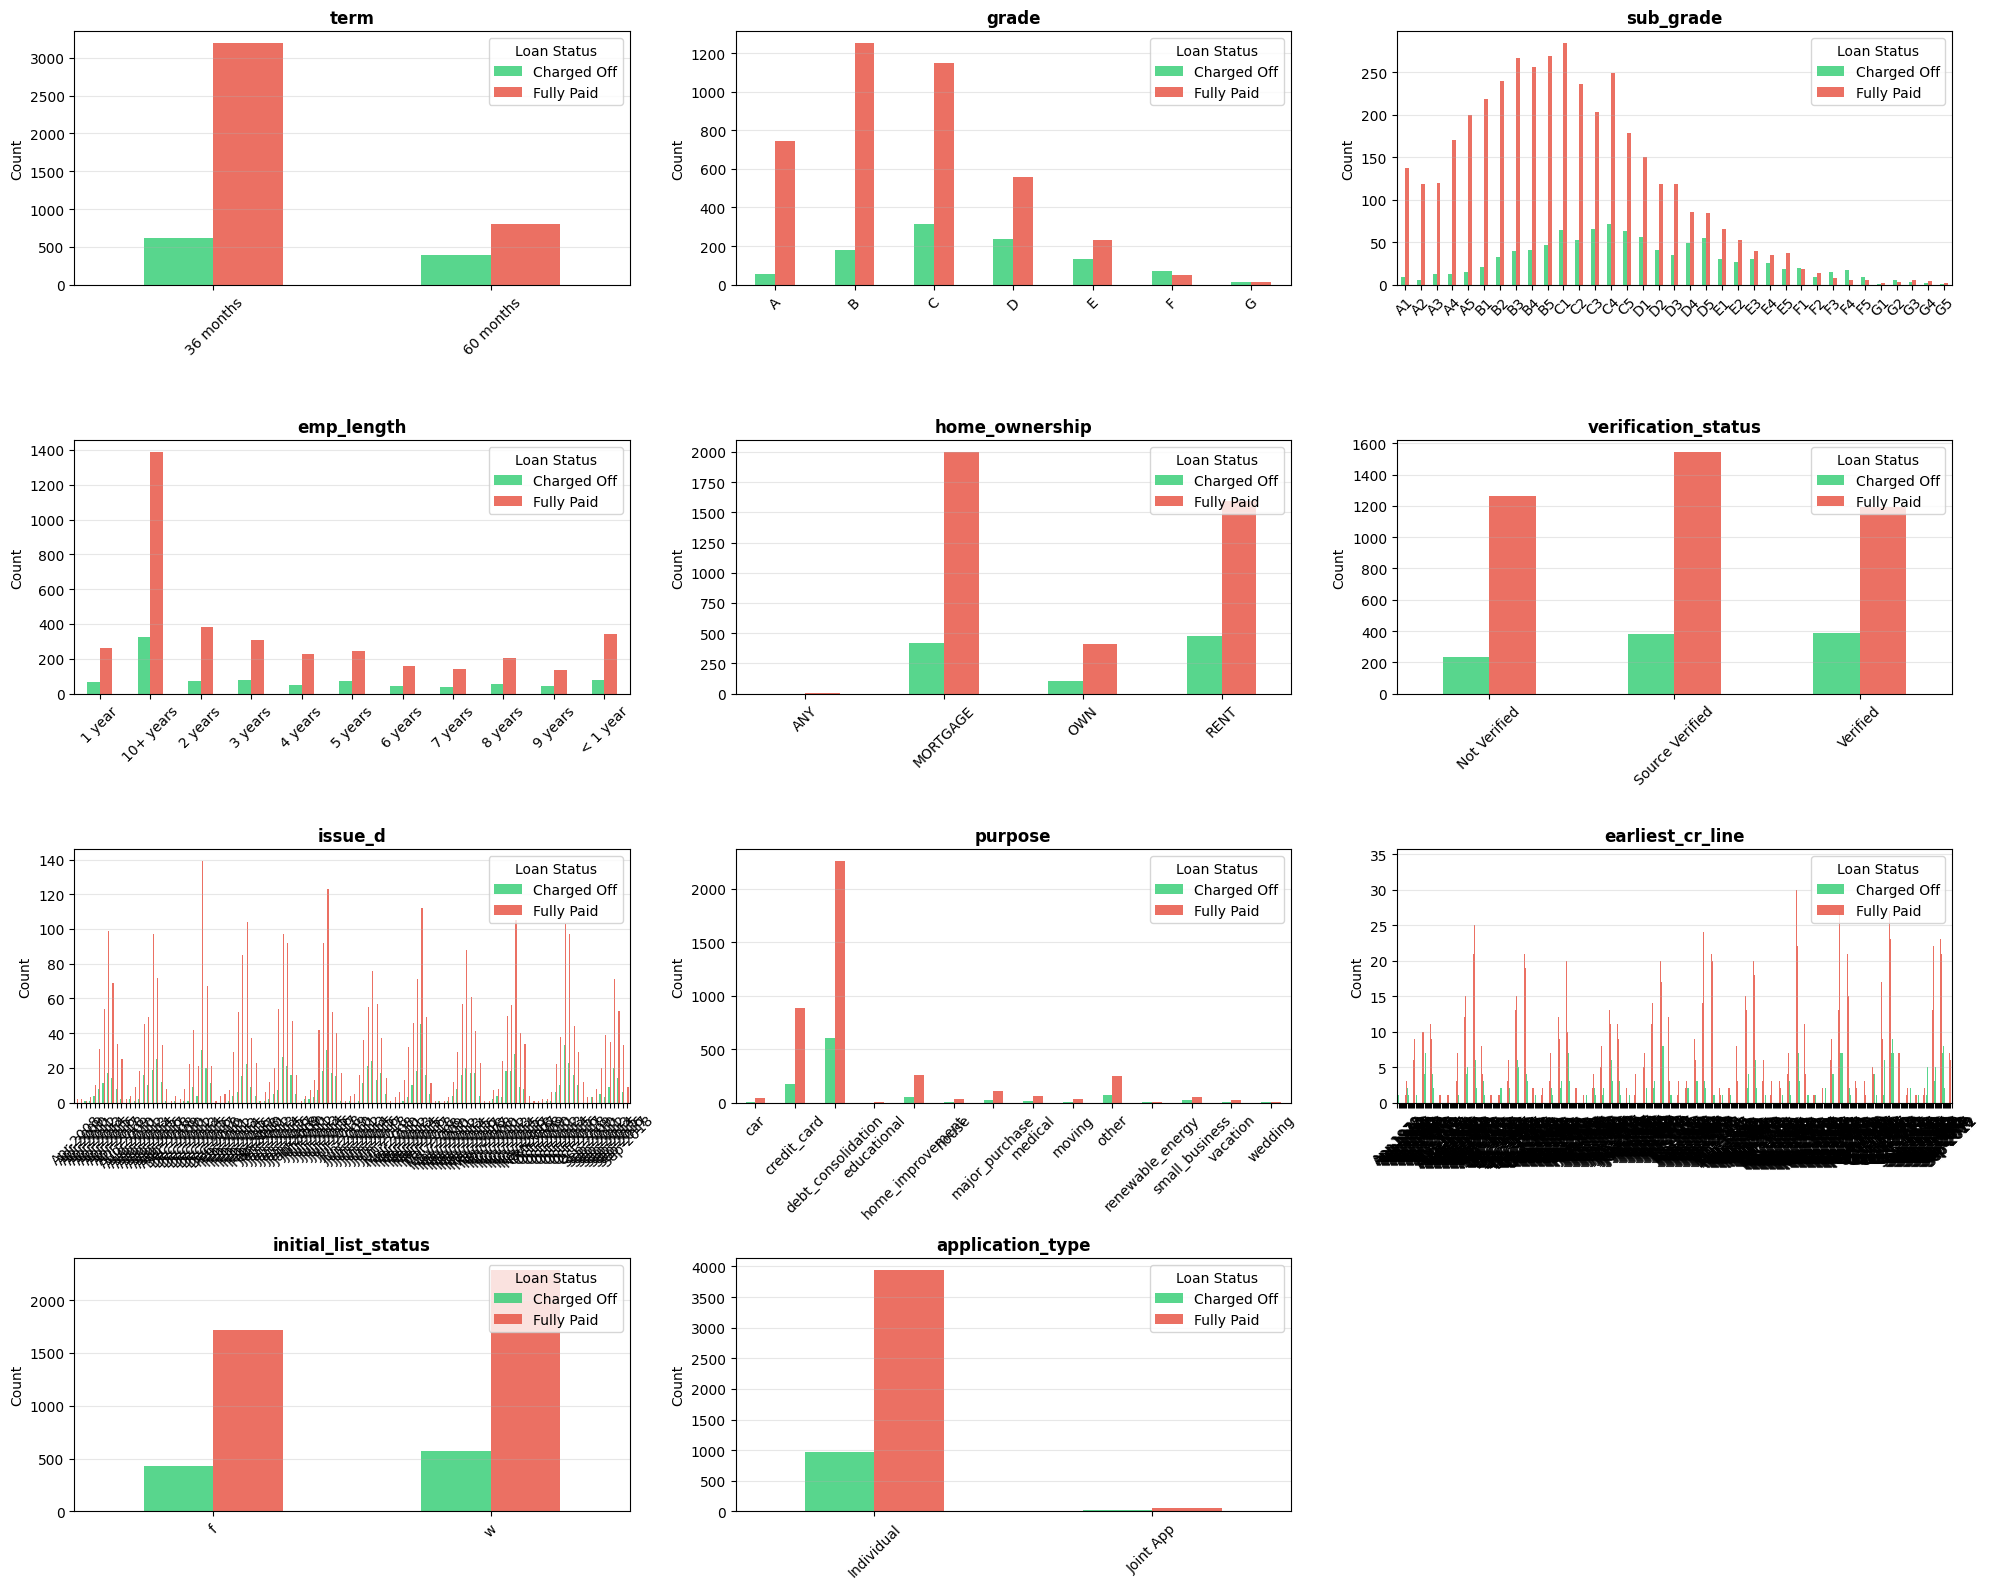

In [30]:
n_categorical = len(categorical_cols)
cols_per_row = 3

n_rows = (n_categorical + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    cross_tab = pd.crosstab(df[col], df['loan_status'])
    cross_tab.plot(kind='bar', ax=axes[idx], color=[colors['Fully Paid'], colors['Charged Off']], alpha=0.8)
    
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Count')
    axes[idx].set_xlabel('')
    axes[idx].legend(title='Loan Status', loc='upper right')
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].tick_params(axis='x', rotation=45)

for idx in range(n_categorical, len(axes)):
    axes[idx].set_visible(False)
    
plt.tight_layout()
plt.show()

## Further Analysis: Missing Value

In [32]:
missing_cols = ['emp_length', 'mort_acc', 'revol_util', 'pub_rec_bankruptcies']
n = len(df)

for c in missing_cols:
    m = df[c].isna().sum()
    
    print(f'\n=== {c} ===')
    print(f'Missing: {m} / {n} ({m/n:.2%})')
    print(df[c].describe(include='all'))
    


=== emp_length ===
Missing: 286 / 5000 (5.72%)
count          4714
unique           11
top       10+ years
freq           1711
Name: emp_length, dtype: object

=== mort_acc ===
Missing: 194 / 5000 (3.88%)
count    4806.000000
mean        1.670412
std         2.030872
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        18.000000
Name: mort_acc, dtype: float64

=== revol_util ===
Missing: 4 / 5000 (0.08%)
count    4996.000000
mean       51.626942
std        24.908536
min         0.000000
25%        32.500000
50%        52.300000
75%        70.800000
max       117.500000
Name: revol_util, dtype: float64

=== pub_rec_bankruptcies ===
Missing: 2 / 5000 (0.04%)
count    4998.000000
mean        0.146659
std         0.405461
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: pub_rec_bankruptcies, dtype: float64


In [33]:
for c in missing_cols:
    miss_rate_by_status = df.groupby('loan_status')[c].apply(lambda s: s.isna().mean()).sort_values(ascending=False)
    print(f'\n=== Missing rate by loan_status {c} ===')
    print(miss_rate_by_status)


=== Missing rate by loan_status emp_length ===
loan_status
Charged Off    0.07300
Fully Paid     0.05325
Name: emp_length, dtype: float64

=== Missing rate by loan_status mort_acc ===
loan_status
Fully Paid     0.041
Charged Off    0.030
Name: mort_acc, dtype: float64

=== Missing rate by loan_status revol_util ===
loan_status
Charged Off    0.0020
Fully Paid     0.0005
Name: revol_util, dtype: float64

=== Missing rate by loan_status pub_rec_bankruptcies ===
loan_status
Fully Paid     0.0005
Charged Off    0.0000
Name: pub_rec_bankruptcies, dtype: float64


In [34]:
key_nums = ['loan_amnt', 'int_rate', 'annual_inc']

for c in missing_cols:
    flag = df[c].isna()
    
    print(f'\n=== {c}: compare w/ key numerics ===')
    
    for x in key_nums:
        if x not in df.columns:
            continue
        g_missing = df.loc[flag, x].dropna()
        g_present = df.loc[~flag, x].dropna()
        
        print(f'{x}: missing_mean={g_missing.mean():.3f} | present_mean={g_present.mean():.3f} | n_missing={len(g_missing)}')


=== emp_length: compare w/ key numerics ===
loan_amnt: missing_mean=10636.101 | present_mean=14415.396 | n_missing=286
int_rate: missing_mean=13.077 | present_mean=13.442 | n_missing=286
annual_inc: missing_mean=48728.625 | present_mean=76459.321 | n_missing=286

=== mort_acc: compare w/ key numerics ===
loan_amnt: missing_mean=11633.892 | present_mean=14302.773 | n_missing=194
int_rate: missing_mean=11.824 | present_mean=13.486 | n_missing=194
annual_inc: missing_mean=70675.731 | present_mean=75042.558 | n_missing=194

=== revol_util: compare w/ key numerics ===
loan_amnt: missing_mean=14681.250 | present_mean=14198.834 | n_missing=4
int_rate: missing_mean=15.225 | present_mean=13.420 | n_missing=4
annual_inc: missing_mean=146500.000 | present_mean=74815.778 | n_missing=4

=== pub_rec_bankruptcies: compare w/ key numerics ===
loan_amnt: missing_mean=12500.000 | present_mean=14199.900 | n_missing=2
int_rate: missing_mean=10.180 | present_mean=13.422 | n_missing=2
annual_inc: missing_m

In [35]:
df.loc[df['emp_length'].isna(), ['loan_status','grade','sub_grade']].value_counts().head(20)

loan_status  grade  sub_grade
Fully Paid   C      C4           23
             B      B4           20
                    B5           16
                    B2           15
             C      C2           15
             B      B3           14
                    B1           12
             C      C1           12
Charged Off  C      C4           11
Fully Paid   C      C3           10
                    C5            9
             A      A1            8
                    A4            8
                    A5            7
             D      D2            7
                    D4            6
Charged Off  C      C1            6
Fully Paid   A      A2            5
Charged Off  B      B2            5
                    B5            5
Name: count, dtype: int64

In [38]:
credit_cols = ['total_acc','open_acc']
df.loc[df['mort_acc'].isna(), credit_cols].describe()
df.loc[~df['mort_acc'].isna(), credit_cols].describe()

,total_acc,open_acc
count,4806.000000,4806.000000
mean,25.115065,11.736579
std,12.112939,5.492337
min,3.000000,1.000000
25%,16.000000,8.000000
50%,24.000000,11.000000
75%,32.000000,15.000000
max,102.000000,47.000000


## Cleaning the dataset

In [7]:
# Store original shape for comparison
original_shape = df.shape[0]

# Create a copy for cleaning
df_cleaned = df.copy()

In [8]:
# Handle missing values
print("Before cleaning:")
print("="*25)
print(f"Shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()[df.isnull().sum() > 0]}\n")

df_cleaned = df_cleaned.dropna(subset=['revol_util', 'pub_rec_bankruptcies'])

df_cleaned['emp_length'] = df_cleaned['emp_length'].fillna('Unknown')

df_cleaned['mort_acc_missing'] = df_cleaned['mort_acc'].isna().astype(int)
df_cleaned['mort_acc'] = df_cleaned['mort_acc'].fillna(df_cleaned['mort_acc'].median())

print("After handling missing values:")
print("="*25)
print(f"Shape: {df_cleaned.shape}")
print(f"Missing values: {df_cleaned.isnull().sum().sum()}\n")

Before cleaning:
Shape: (5000, 24)
Missing values:
emp_length              286
revol_util                4
mort_acc                194
pub_rec_bankruptcies      2
dtype: int64

After handling missing values:
Shape: (4994, 25)
Missing values: 0



In [9]:
# Save cleaned dataset
CLEANED_DATA_PATH = '../data/processed/lending-club-cleaned.csv'

df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.to_csv(CLEANED_DATA_PATH, index=False)

# Calculate actual rows removed
rows_removed = original_shape - df_cleaned.shape[0]
rows_removed_pct = (rows_removed / original_shape) * 100

print("CLEANING SUMMARY")
print("=" * 50)
print(f"Original dataset shape: {original_shape}")
print(f"Final dataset shape: {df_cleaned.shape[0]}")
print(f"Rows removed: {rows_removed} ({rows_removed_pct:.2f}%)")
print(f"No missing values remaining: {df_cleaned.isnull().sum().sum() == 0}")
print(f"\nCleaned dataset saved to: {CLEANED_DATA_PATH}")

CLEANING SUMMARY
Original dataset shape: 5000
Final dataset shape: 4994
Rows removed: 6 (0.12%)
No missing values remaining: True

Cleaned dataset saved to: ../data/processed/lending-club-cleaned.csv
